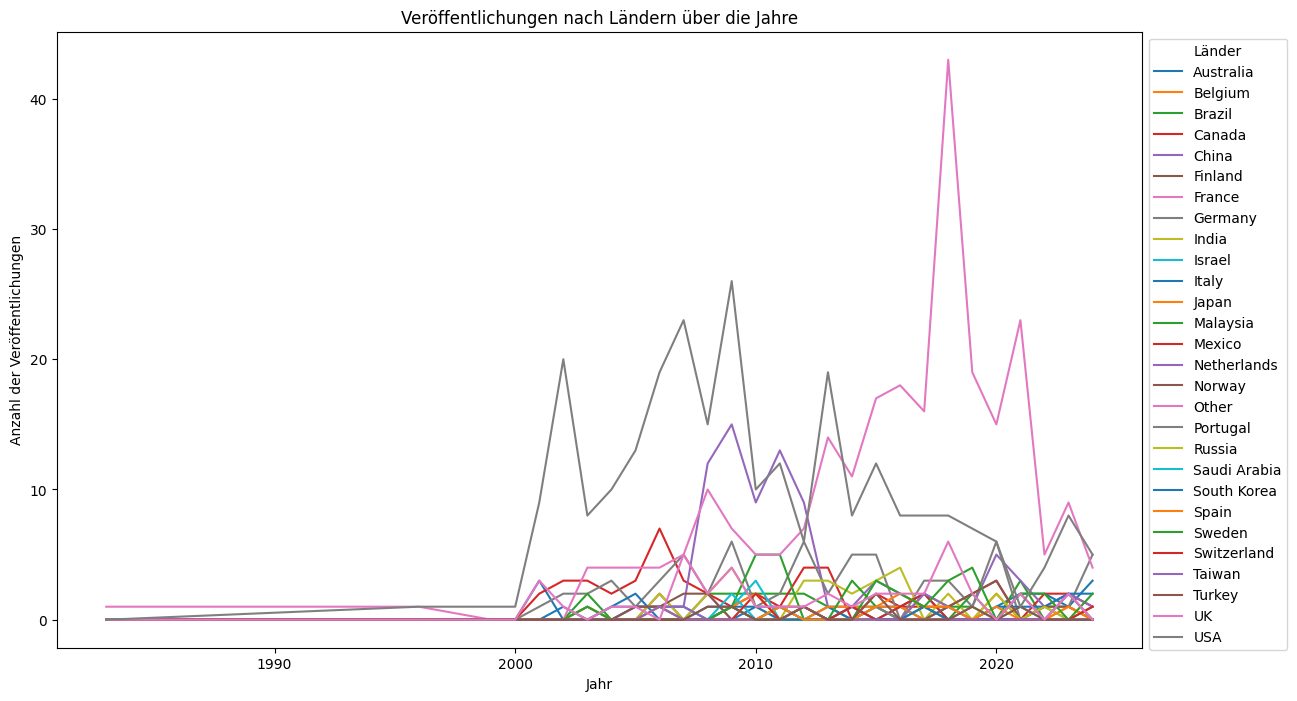

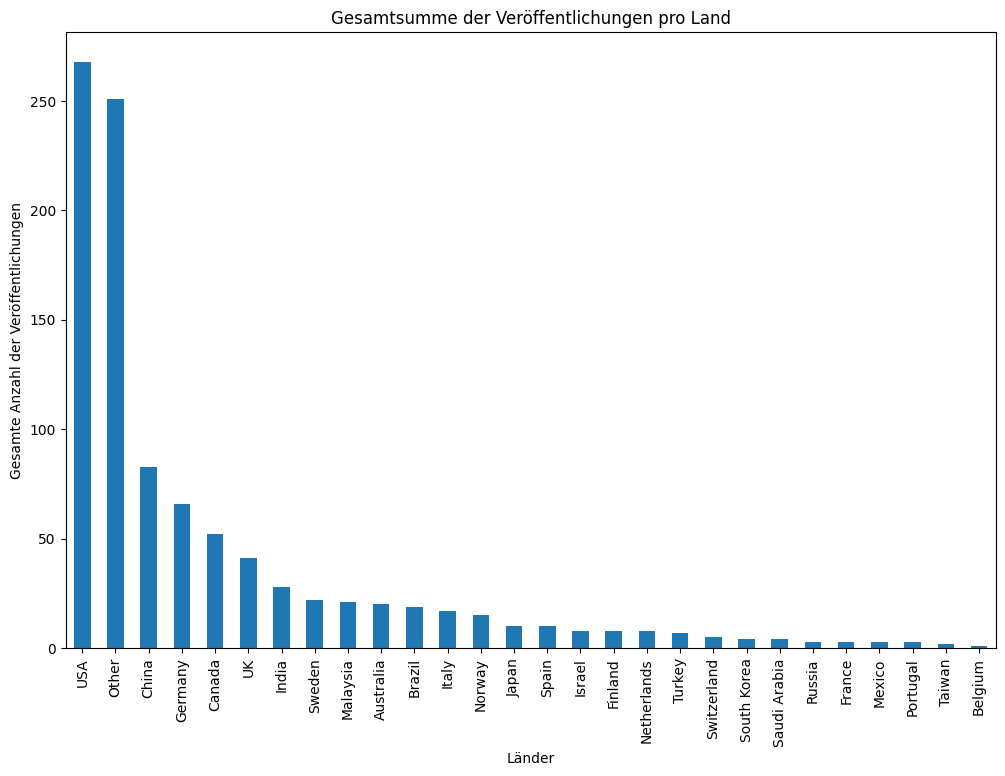

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'test_dataset.csv')

# CSV-Datei einlesen
data = pd.read_csv(csv_file_path)

# Universitäten (Verteilung)

# 2. Länder extrahieren mit erweiterten Länderzuordnungen
country_patterns = {
    "USA": "USA|United States|America",
    "Germany": "Germany|Deutschland",
    "China": "China|PRC|People's Republic of China",
    "Canada": "Canada",
    "UK": "UK|United Kingdom|England",
    "France": "France",
    "India": "India",
    "Japan": "Japan",
    "Australia": "Australia",
    "Italy": "Italy|Italia",
    "Netherlands": "Netherlands|Holland",
    "South Korea": "South Korea|Republic of Korea",
    "Sweden": "Sweden",
    "Brazil": "Brazil",
    "Spain": "Spain|España",
    "Switzerland": "Switzerland",
    "Russia": "Russia|Russian Federation",
    "Singapore": "Singapore",
    "Belgium": "Belgium",
    "Turkey": "Turkey",
    "Taiwan": "Taiwan",
    "Poland": "Poland",
    "Norway": "Norway",
    "Denmark": "Denmark",
    "Finland": "Finland",
    "Israel": "Israel",
    "Saudi Arabia": "Saudi Arabia",
    "Malaysia": "Malaysia",
    "Mexico": "Mexico",
    "Portugal": "Portugal",
    "Other": ".*"  # Für alles, was nicht einem spezifischen Land zugeordnet werden kann
}

# Funktion zur Länderextraktion
def extract_country(affiliation):
    for country, pattern in country_patterns.items():
        if re.search(pattern, affiliation, re.IGNORECASE):
            return country
    return "Other"

# Länderzuordnung auf die "Author Affiliations"-Spalte anwenden
data['Country'] = data['Author Affiliations'].fillna('').apply(extract_country)

# 3. Zählen der Veröffentlichungen pro Jahr und pro Land
year_country_counts = data.groupby(['Publication Year', 'Country']).size().unstack(fill_value=0)

# 4. Visualisierung der Veröffentlichungen pro Land über die Jahre

# Liniendiagramm: Entwicklung der Veröffentlichungen nach Ländern über die Jahre
plt.figure(figsize=(14, 8))
for country in year_country_counts.columns:
    plt.plot(year_country_counts.index, year_country_counts[country], label=country)
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Veröffentlichungen')
plt.title('Veröffentlichungen nach Ländern über die Jahre')
plt.legend(title="Länder", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Balkendiagramm: Gesamtsumme der Veröffentlichungen pro Land
total_publications_by_country = year_country_counts.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_publications_by_country.plot(kind='bar')
plt.xlabel('Länder')
plt.ylabel('Gesamte Anzahl der Veröffentlichungen')
plt.title('Gesamtsumme der Veröffentlichungen pro Land')
plt.show()
